In [ ]:
import numpy as np
import librosa as lb

from core import LSTM, MSELoss, Adam
from voice_enhancement.fourier_transform import compute_stft, compute_stft_inv, convert_to_db, filter_downsample, plot_spectrogram

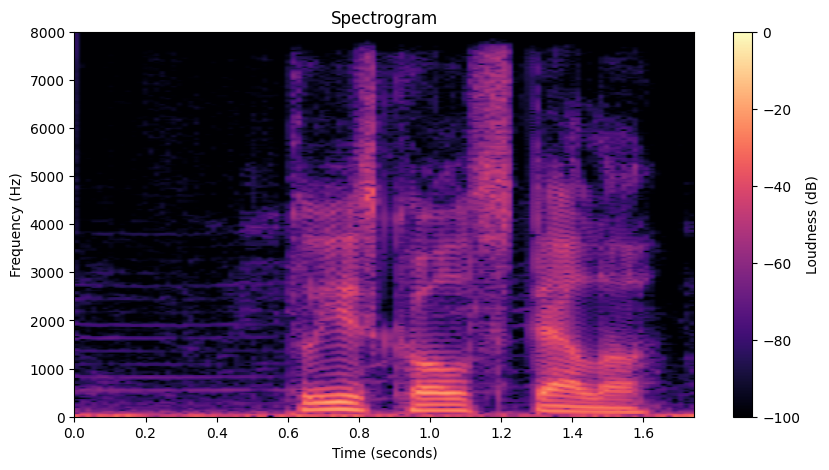

In [4]:
sample_path = r'voice_dataset\noisy_testset_wav\p232_001.wav'

audio, sr_orig = lb.load(sample_path, sr=None)

sr_target = 16000
# audio_16k = filter_downsample(audio, sr_orig, sr_target)
# Our implementation of downsampling is n^2 and librosa is n log n. It probably works, but it needs 117Gb of memory to do simple calc.
audio_16k = lb.resample(audio, orig_sr=sr_orig, target_sr=sr_target)

N = 512
hop = 256

spectrogram, orig_len = compute_stft(audio_16k, N=N, hop=hop)

plot_spectrogram(spectrogram, sr_target, hop, N)

In [ ]:
# Our idea for training the model: We have our audio. We turn it into a spectrogram, of shape (B, num_frames, bins)
# We feed the LSTM just np.abs(spectrogram) scaled to decibels
# We store the magnitude and the phase. We need it to reconstruct it later.
# LSTM masks the magnitudes, then we just do clean_magnitude * np.exp(1j * phase) to correctly scale and rotate
# Then we convert new spectrogram back to audio